# **Práctica 1: Análisis exploratorio de datos**

Nombre:

No. Cuenta:

Email:

### **Contexto**

El sector inmobiliario de Melbourne, Australia continúa en auge desde hace algunos años. 
Es de interés conocer la tendencia inmobiliaria en dicha ciudad debido a que cada vez es más difícil adquirir una unidad de 2 dormitorios a un precio razonable.

**Objetivo:** Encontrar información de interés para predecir la próxima tendencia inmobiliaria en Melbourne.


**Fuente de datos**

* 1) Rooms: Número de habitaciones.
* 2) Price: Precio en dolares.
* 3) Method: S - propiedad vendida; SP - propiedad vendida antes; PI - propiedad transferida; PN - vendida antes no revelada; SN - vendida no revelada; NB - sin oferta; VB - oferta del proveedor; W - retirada antes de la subasta; SA - vendida después de subasta; SS - vendida después del precio de subasta no revelado. N/A - precio u oferta más alta no disponible.
* 4) Type: br - dormitorio (s); h - casa, cabaña, villa, semi, terraza; u - unidad, dúplex; t - casa adosada; dev site – en desarrollo; o res - otro residencial.
* 5) SellerG: Agente de bienes raíces.
* 6) Date: Fecha de venta.
* 7) Distance: Distancia del CBD (Centro de negocios).
* 8) Regionname: Región general (oeste, noroeste, norte, noreste ...).
* 9) Propertycount: Número de propiedades que existen en el suburbio.
* 10) Bedroom2: Número de dormitorios (de otra fuente).
* 11) Bathroom: Cantidad de baños.
* 12) Car: Número de estacionamientos.
* 13) Landsize: Tamaño del terreno.
* 14) BuildingArea: Tamaño del edificio.
* 15) CouncilArea: Consejo de gobierno de la zona (Municipio).


### **Importar las bibliotecas y los datos**

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline                
# Para generar y almacenar los gráficos dentro del cuaderno

In [3]:
DatosMelbourne = pd.read_csv("spr_cobertura_estaciones_fm_altavoz.csv", encoding='latin-1')
DatosMelbourne

,AÑO,PERIODO,ESTADO,ESTACIÓN,DISTINTIVO,FRECUENCIA FM,POBLACION CUBIERTA (2020),PORCENTAJE DE POBLACION NACIONAL CUBIERTA
0,2022,Julio-Septiembre,Sinaloa,Mazatlan,XHSPRM-FM,103.5,"500,348",0.45%
1,2022,Julio-Septiembre,Chiapas,Tapachula,XHSPRT-FM,101.1,"650,673",0.58%
2,2022,Julio-Septiembre,Veracruz,Coatzacoalcos,XHTZA-FM,104.3,"886,843",0.79%
3,2022,Julio-Septiembre,Colima,Colima,XHSPRC-FM,102.9,"397,869",0.35%
4,2022,Octubre-Diciembre,Sinaloa,Mazatlan,XHSPRM-FM,103.5,"500,348",0.45%
5,2022,Octubre-Diciembre,Chiapas,Tapachula,XHSPRT-FM,101.1,"650,673",0.58%
6,2022,Octubre-Diciembre,Veracruz,Coatzacoalcos,XHTZA-FM,104.3,"886,843",0.79%
7,2022,Octubre-Diciembre,Colima,Colima,XHSPRC-FM,102.9,"397,869",0.35%


Tipo:

br - dormitorio(s);

h - casa, cabaña, villa, semi, terraza; 

u - unidad, dúplex; 

t - casa adosada; 

dev site - sitio de desarrollo; o 

res - otro residencial.

In [4]:
DatosMelbourne.head(10)
#DatosMelbourne.tail(10) diez elementos

,AÑO,PERIODO,ESTADO,ESTACIÓN,DISTINTIVO,FRECUENCIA FM,POBLACION CUBIERTA (2020),PORCENTAJE DE POBLACION NACIONAL CUBIERTA
0,2022,Julio-Septiembre,Sinaloa,Mazatlan,XHSPRM-FM,103.5,"500,348",0.45%
1,2022,Julio-Septiembre,Chiapas,Tapachula,XHSPRT-FM,101.1,"650,673",0.58%
2,2022,Julio-Septiembre,Veracruz,Coatzacoalcos,XHTZA-FM,104.3,"886,843",0.79%
3,2022,Julio-Septiembre,Colima,Colima,XHSPRC-FM,102.9,"397,869",0.35%
4,2022,Octubre-Diciembre,Sinaloa,Mazatlan,XHSPRM-FM,103.5,"500,348",0.45%
5,2022,Octubre-Diciembre,Chiapas,Tapachula,XHSPRT-FM,101.1,"650,673",0.58%
6,2022,Octubre-Diciembre,Veracruz,Coatzacoalcos,XHTZA-FM,104.3,"886,843",0.79%
7,2022,Octubre-Diciembre,Colima,Colima,XHSPRC-FM,102.9,"397,869",0.35%


Método:

S - propiedad vendida; 
SP - propiedad vendida antes; 
PI - propiedad transferida; 
PN - vendido antes no revelado; 
SN - vendido no revelado; 
NB - sin oferta; 
VB - oferta del proveedor; 
W - retirado antes de la subasta; 
SA - vendido después de subasta; 
SS - vendido después del precio de subasta no revelado. 
N/A - precio o oferta más alta no disponible.

### **Paso 1: Descripción de la estructura de los datos**

1) Forma (dimensiones) del DataFrame

El atributo .shape de Pandas proporciona una estructura general de los datos. Devuelve la cantidad de filas y columnas que tiene el conjunto de datos.

In [5]:
DatosMelbourne.shape

(8, 8)

2) Tipos de datos (variables)

El atributo .dtypes muestra los tipos de datos de las columnas (variables y tipos).

In [6]:
DatosMelbourne.dtypes

AÑO                                            int64
PERIODO                                       object
ESTADO                                        object
ESTACIÓN                                      object
DISTINTIVO                                    object
FRECUENCIA FM                                float64
POBLACION CUBIERTA (2020)                     object
PORCENTAJE DE POBLACION NACIONAL CUBIERTA     object
dtype: object

Se observa que el conjunto de datos tiene una combinación de variables categóricas (objeto) y numéricas (flotante e int).

### **Paso 2: Identificación de datos faltantes**

Una función útil de pandas es **.isnull().sum()** que regresa la suma de todos los valores nulos en cada variable.

In [7]:
DatosMelbourne.isnull().sum()

AÑO                                          0
PERIODO                                      0
ESTADO                                       0
ESTACIÓN                                     0
DISTINTIVO                                   0
FRECUENCIA FM                                0
POBLACION CUBIERTA (2020)                    0
PORCENTAJE DE POBLACION NACIONAL CUBIERTA    0
dtype: int64

También se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos.

In [8]:
DatosMelbourne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   AÑO                                        8 non-null      int64  
 1   PERIODO                                    8 non-null      object 
 2   ESTADO                                     8 non-null      object 
 3   ESTACIÓN                                   8 non-null      object 
 4   DISTINTIVO                                 8 non-null      object 
 5   FRECUENCIA FM                              8 non-null      float64
 6   POBLACION CUBIERTA (2020)                  8 non-null      object 
 7   PORCENTAJE DE POBLACION NACIONAL CUBIERTA  8 non-null      object 
dtypes: float64(1), int64(1), object(6)
memory usage: 640.0+ bytes


# **Paso 3: Detección de valores atípicos**

Se pueden utilizar gráficos para tener una idea general de las distribuciones de los datos, y se sacan estadísticas para resumir los datos. Estas dos estrategias son recomendables y se complementan.

La distribución se refiere a cómo se distribuyen los valores en una variable o con qué frecuencia ocurren.

Para las variables numéricas, se observa cuántas veces aparecen grupos de números en una columna. Mientras que para las variables categóricas, son las clases de cada columna y su frecuencia.

**1) Distribución de variables numéricas**

* Se utilizan histogramas que agrupan los números en rangos.
* La altura de una barra muestra cuántos números caen en ese rango. 
* Se emplea **hist()** para trazar el histograma de las variables numéricas. También se pueden usar los parámetros: **figsize** y **xrot** para aumentar el tamaño de la cuadrícula y rotar el eje x 45 grados.

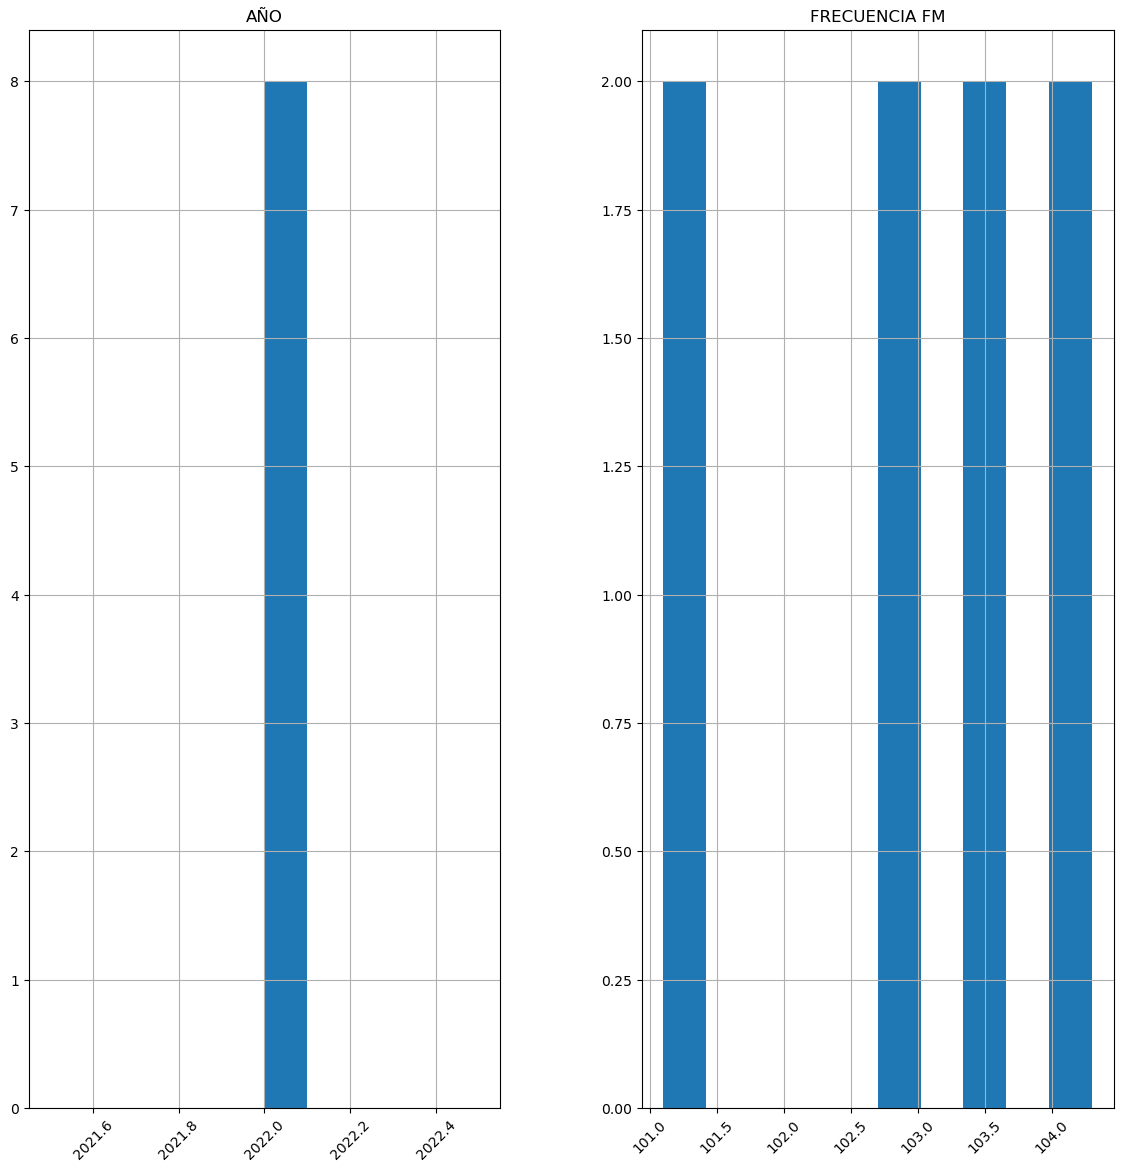

In [9]:
DatosMelbourne.hist(figsize=(14,14), xrot=45)
plt.show()

**Qué buscar:**

* Posibles valores atípicos, que pueden ser errores de medición.
* Límites que no tienen sentido, como valores porcentuales > 100.

En el histograma, se observa que **BuildingArea** y **LandSize** tienen valores sesgados a la izquierda. La variable **Price** también está sesgada hacia la izquierda. **YearBuilt** está sesgado hacia la derecha y el límite comienza en 1200, lo cual es extraño.

**2) Resumen estadístico de variables numéricas**

Se sacan estadísticas usando **describe()** que muestra un resumen estadístico de las variables numéricas.

In [10]:
DatosMelbourne.describe()

,AÑO,FRECUENCIA FM
count,8.0,8.000000
mean,2022.0,102.950000
std,0.0,1.259251
min,2022.0,101.100000
25%,2022.0,102.450000
50%,2022.0,103.200000
75%,2022.0,103.700000
max,2022.0,104.300000


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores perdidos. Estos son: **Car**, **Landsize** y **YearBuilt**.

**3) Diagramas para detectar posibles valores atípicos**

Para este tipo de gráficos se utiliza **Seaborn**, que permite generar diagramas de cajas para detectar valores atípicos.

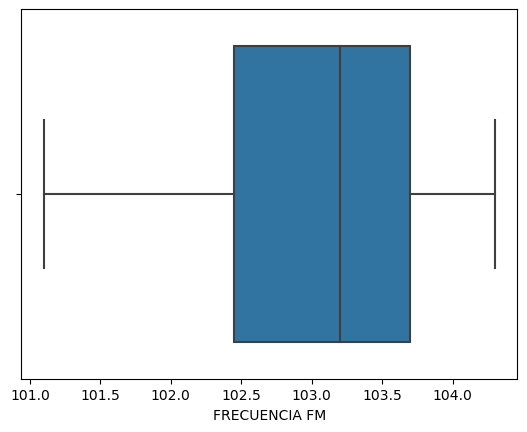

In [24]:
variable = ['FRECUENCIA FM']
for col in variable:
    sns.boxplot(x=col, data=DatosMelbourne)
    plt.show()

Se observa que Landsize, Buildingarea y YearBuilt tienen valores atípicos que están lejos de los otros valores.

**4) Distribución de variables categóricas**

Se refiere a la observación de las clases de cada columna (variable) y su frecuencia. Aquí, los gráficos ayudan para tener una idea general de las distribuciones, mientras que las estadísticas dan números reales.

In [25]:
DatosMelbourne.describe(include='object')

,PERIODO,ESTADO,ESTACIÓN,DISTINTIVO,POBLACION CUBIERTA (2020),PORCENTAJE DE POBLACION NACIONAL CUBIERTA
count,8,8,8,8,8,8
unique,2,4,4,4,4,4
top,Julio-Septiembre,Sinaloa,Mazatlan,XHSPRM-FM,"500,348",0.45%
freq,4,2,2,2,2,2


* Esta tabla es diferente al de los valores numéricos. Aquí, se obtiene el recuento de los valores de cada variable, el número de clases únicas, la clase más frecuente y con qué frecuencia ocurre esa clase en el conjunto de datos.
* Se observa que algunas clases tienen demasiados valores únicos, como Address, seguida de Suburb y SellerG. 
* A partir de estos hallazgos, se puede a manera de ejemplo graficar las variables con 10 o menos clases únicas.

**Plot**

* Para este tipo de gráficos se utiliza Seaborn, que permite generar un histograma para variables categóricas. Cada barra en el gráfico de conteo representa una clase.
* Se crea un bucle para el conteo y distribución de las clases. La sentencia select_dtypes(include = ’object’) selecciona las columnas categóricas con sus valores y las muestra.
* Se incluye también If para elegir solo las tres columnas con 10 o menos clases usando series.**nunique() < 10**.


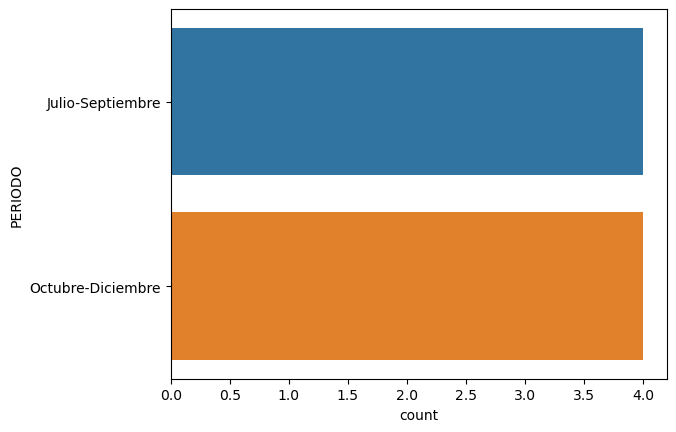

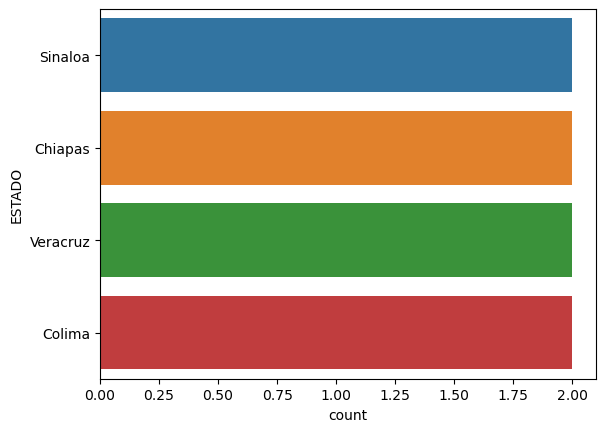

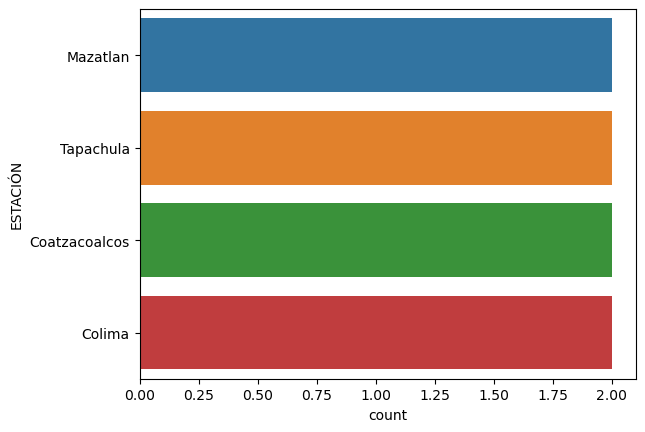

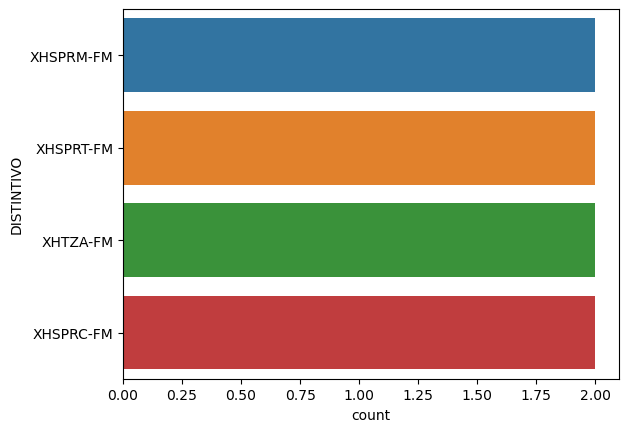

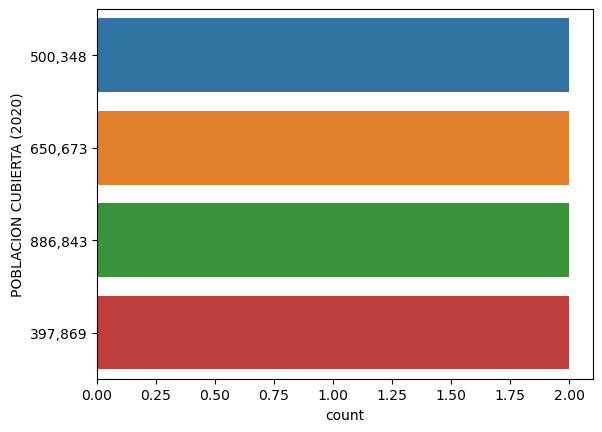

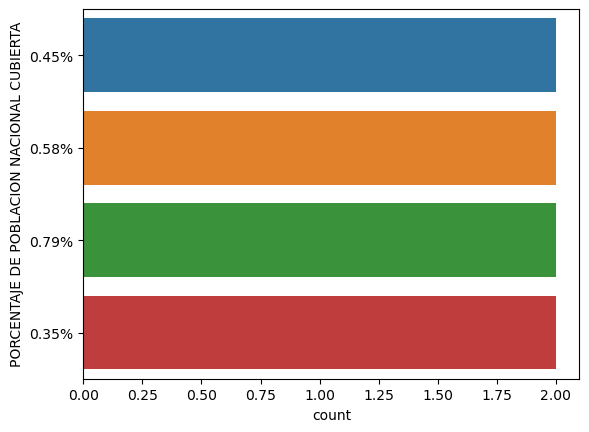

In [26]:
for col in DatosMelbourne.select_dtypes(include='object'):
  if DatosMelbourne[col].nunique()<10:sns.countplot(y=col, data=DatosMelbourne)
  plt.show()

**5) Agrupación por variables categóricas**





In [27]:
for col in DatosMelbourne.select_dtypes(include='object'):
  if DatosMelbourne[col].nunique() < 10:
    display(DatosMelbourne.groupby(col).agg(['mean']))

C:\Users\Imanol\AppData\Local\Temp\ipykernel_4252\1420516424.py:3: FutureWarning: ['ESTADO', 'ESTACIÓN', 'DISTINTIVO', 'POBLACION CUBIERTA (2020)', 'PORCENTAJE DE POBLACION NACIONAL CUBIERTA'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  display(DatosMelbourne.groupby(col).agg(['mean']))


,AÑO,FRECUENCIA FM
,mean,mean
PERIODO,,
Julio-Septiembre,2022.0,102.95
Octubre-Diciembre,2022.0,102.95


C:\Users\Imanol\AppData\Local\Temp\ipykernel_4252\1420516424.py:3: FutureWarning: ['PERIODO', 'ESTACIÓN', 'DISTINTIVO', 'POBLACION CUBIERTA (2020)', 'PORCENTAJE DE POBLACION NACIONAL CUBIERTA'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  display(DatosMelbourne.groupby(col).agg(['mean']))


,AÑO,FRECUENCIA FM
,mean,mean
ESTADO,,
Chiapas,2022.0,101.1
Colima,2022.0,102.9
Sinaloa,2022.0,103.5
Veracruz,2022.0,104.3


C:\Users\Imanol\AppData\Local\Temp\ipykernel_4252\1420516424.py:3: FutureWarning: ['PERIODO', 'ESTADO', 'DISTINTIVO', 'POBLACION CUBIERTA (2020)', 'PORCENTAJE DE POBLACION NACIONAL CUBIERTA'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  display(DatosMelbourne.groupby(col).agg(['mean']))


,AÑO,FRECUENCIA FM
,mean,mean
ESTACIÓN,,
Coatzacoalcos,2022.0,104.3
Colima,2022.0,102.9
Mazatlan,2022.0,103.5
Tapachula,2022.0,101.1


C:\Users\Imanol\AppData\Local\Temp\ipykernel_4252\1420516424.py:3: FutureWarning: ['PERIODO', 'ESTADO', 'ESTACIÓN', 'POBLACION CUBIERTA (2020)', 'PORCENTAJE DE POBLACION NACIONAL CUBIERTA'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  display(DatosMelbourne.groupby(col).agg(['mean']))


,AÑO,FRECUENCIA FM
,mean,mean
DISTINTIVO,,
XHSPRC-FM,2022.0,102.9
XHSPRM-FM,2022.0,103.5
XHSPRT-FM,2022.0,101.1
XHTZA-FM,2022.0,104.3


C:\Users\Imanol\AppData\Local\Temp\ipykernel_4252\1420516424.py:3: FutureWarning: ['PERIODO', 'ESTADO', 'ESTACIÓN', 'DISTINTIVO', 'PORCENTAJE DE POBLACION NACIONAL CUBIERTA'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  display(DatosMelbourne.groupby(col).agg(['mean']))


,AÑO,FRECUENCIA FM
,mean,mean
POBLACION CUBIERTA (2020),,
"397,869",2022.0,102.9
"500,348",2022.0,103.5
"650,673",2022.0,101.1
"886,843",2022.0,104.3


C:\Users\Imanol\AppData\Local\Temp\ipykernel_4252\1420516424.py:3: FutureWarning: ['PERIODO', 'ESTADO', 'ESTACIÓN', 'DISTINTIVO', 'POBLACION CUBIERTA (2020)'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  display(DatosMelbourne.groupby(col).agg(['mean']))


,AÑO,FRECUENCIA FM
,mean,mean
PORCENTAJE DE POBLACION NACIONAL CUBIERTA,,
0.35%,2022.0,102.9
0.45%,2022.0,103.5
0.58%,2022.0,101.1
0.79%,2022.0,104.3


### **Paso 4: Identificación de relaciones entre pares variables**

Una matriz de correlaciones es útil para analizar la relación entre las variables numéricas.
Se emplea la función corr()

In [28]:
DatosMelbourne.corr()

,AÑO,FRECUENCIA FM
AÑO,NaN,NaN
FRECUENCIA FM,NaN,1.0


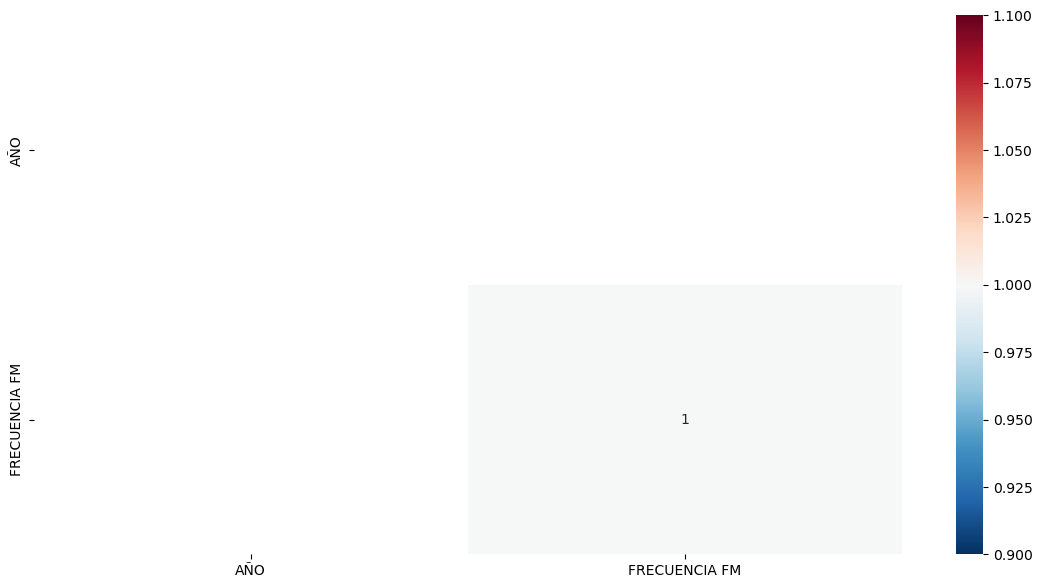

In [29]:
plt.figure(figsize=(14,7))
sns.heatmap(DatosMelbourne.corr(), cmap='RdBu_r', annot=True)
plt.show()

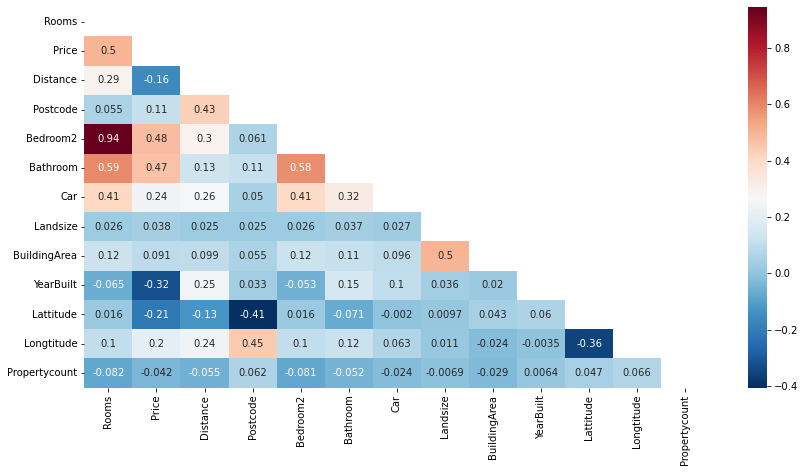

In [18]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(DatosMelbourne.corr())
sns.heatmap(DatosMelbourne.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

* Una correlación es un valor entre -1 y 1 que equivale a qué tan cerca se mueven simultáneamente los valores de dos variables. 
* Una correlación positiva significa que a medida que una característica aumenta, la otra también aumenta.
* Una correlación negativa significa que a medida que una característica disminuye, la otra también disminuye. 
* Las correlaciones cercanas a 0 indican una relación débil, mientras que las más cercanas a -1 o 1 significan una relación fuerte.
